# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter....predicting a number.


In [1]:
# Import Tensorflow
import tensorflow as tf
print (tf.__version__)

2.4.1


# Creating data to view and fit

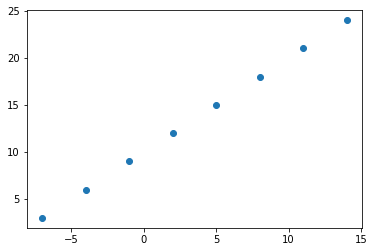

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
# Does y = X + 10
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes


In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
#
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
#
X[0].ndim

0

In [9]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,  y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

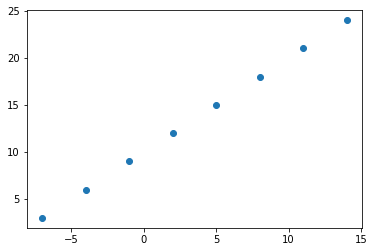

In [11]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
1. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of the model)
1. **Fitting a model** - letting the model try to find patterns between X and Y (features and labels)

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (specified to your problem) using the sequential API
model = tf.keras.Sequential([
    # 1 layer because we want to take in one input, and produce 1 output
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    # mae is short for mean absolute error, computes the mean absolute error between errors and predictions
    loss=tf.keras.losses.mae, 
    # SGD is short for stochastic gradient descent
    # Optimizer tells the neural network how to improve
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs=5)

# 4. Evaluate the model


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

# Improve our model

We can improve our model by altering the steps we took to create the model.

1. **Creating a model** - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
1. **Compiling a model - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
1. ** Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)


In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (specified to your problem) using the sequential API
model = tf.keras.Sequential([
    # 1 layer because we want to take in one input, and produce 1 output
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(50, activation=None),
    #tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    # mae is short for mean absolute error, computes the mean absolute error between errors and predictions
    loss=tf.keras.losses.mae, 
    # Adam is the optimizer
    # lr = learning rate - how much should the adam optimizer push the model to improve
    # Optimizer tells the neural network how to improve
    optimizer=tf.keras.optimizers.Adam(lr = 0.01),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs=100)

# 4. Evaluate the model


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7151 - mae: 9.7151
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5150 - mae: 7.5150
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - lo

In [15]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[27.068876]], dtype=float32)

#  Train on a bigger data set

In [16]:
X_nprange = np.arange(-100.0, 3000.0, 3.0)
y_nprange = X_nprange + 10
#X_nprange, y_nprange
X_bigger = tf.cast(tf.constant(X_nprange), dtype=tf.float32)
y_bigger = tf.cast(tf.constant(y_nprange), dtype=tf.float32)
#X_bigger,  y_bigger

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (specified to your problem) using the sequential API
model = tf.keras.Sequential([
    # 1 layer because we want to take in one input, and produce 1 output
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    # mae is short for mean absolute error, computes the mean absolute error between errors and predictions
    loss=tf.keras.losses.mae, 
    # Adam is the optimizer
    # lr = learning rate - how much should the adam optimizer push the model to improve
    # Optimizer tells the neural network how to improve
    optimizer=tf.keras.optimizers.Adam(lr = 0.00001),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(X_bigger, y_bigger, epochs=100)

# 4. Evaluate the model

Epoch 1/100
33/33 [==============================] - 2s 5ms/step - loss: 1374.5139 - mae: 1374.5139
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 1427.3104 - mae: 1427.3104
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 1361.5301 - mae: 1361.5301
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 1331.9734 - mae: 1331.9734
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 1333.5534 - mae: 1333.5534
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 1291.7534 - mae: 1291.7534
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 1210.6829 - mae: 1210.6829
Epoch 8/100
33/33 [==============================] - 0s 5ms/step - loss: 1228.8357 - mae: 1228.8357
Epoch 9/100
33/33 [==============================] - 0s 4ms/step - loss: 1229.9238 - mae: 1229.9238
Epoch 10/100
33/33 [==============================] - 0s 5ms/step - loss: 1170.3518 - mae: 1170.3518

In [17]:
# Try and make a prediction using the model
y_pred = model.predict([40000.0])
y_pred

array([[40184.266]], dtype=float32)

# Evaluating a model

In practice, a typical workflow youll go through when building neural networs is:
```
Build a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it --> tweak a model --> ...
```


When it comes to evaluation, there are 3 wonderful words you should memorize:
> visualize, visualize, visualize

Its a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns.
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original data set)

In [18]:
# Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

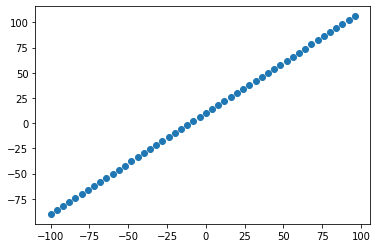

In [20]:
# Visualize the data
import matplotlib.pyplot as pyplot

plt.scatter(X, y)

### The 3 sets
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned. This set is typically 10-15% of the total data available.


In [21]:
#Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] #first 40 are training samples (80% of the dataset)
y_train = y[:40]

X_test = X[40:] #last 10 ar etesting samples (20% of the data)
y_test = y[40:] 

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data
Now we've got out data in training and test sets, lets visualize it again!


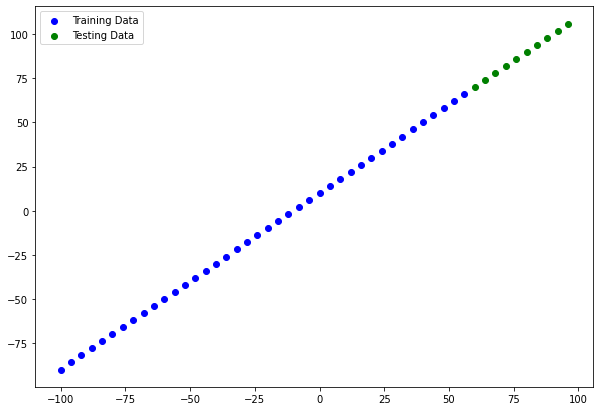

In [23]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
#Show a legend
plt.legend()


In [24]:
# Lets have a look at how to build a neural network with our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the mmodel
#model.fit(X_train, y_train, epochs=100)

model

In [25]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [26]:
# Lets create a model which builds automatically by defining the input_shape in the first layer
tf.random.set_seed(42)

# 1. Create a model, same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#model.build()

# Visualizing the model


In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non trainable params - there parameters arent updated during training (this is typical when you have parameters from other models through transfer learning)


In [28]:
# Lets fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - los